In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import geopandas as gp
import os
import json
import urllib.request as urllib
import statsmodels.formula.api as smf 


In [2]:
api = 'https://data.cityofnewyork.us/resource/m46j-75iy.json'
data = json.loads(urllib.urlopen(api).read())
type(data)

list

In [3]:
nrg = pd.DataFrame(data)

In [4]:
print(type(nrg), nrg.shape)

<class 'pandas.core.frame.DataFrame'> (1000, 32)


In [5]:
nrg.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,bin,borough,census_tract,co_reported_bbl_status,community_board,community_council,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,N/A,1000410001,NaN,Manhattan,NaN,NaN,NaN,NaN,NaN,BBL not valid,...,918919,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,NaN,Queens,NaN,NaN,NaN,NaN,NaN,No Submission Matched to BBL,...,#N/A,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375
2,N/A,2027620097,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,BBL not valid,...,64200,N/A,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,1012266,Manhattan,99,NaN,4,3,NaN,No Submission Matched to BBL,...,#N/A,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001
4,N/A,2048300034,NaN,Bronx,NaN,NaN,NaN,NaN,NaN,Not on Covered Buildings List,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [6]:
nrg.columns

Index(['automatic_water_benchmarking_eligible', 'bbls_co_reported', 'bin',
       'borough', 'census_tract', 'co_reported_bbl_status', 'community_board',
       'community_council', 'direct_ghg_emissions_mtco2e',
       'dof_benchmarking_submission_status', 'dof_number_of_buildings',
       'dof_property_floor_area_buildngs_and_parking_ft2', 'energy_star_score',
       'indirect_ghg_emissions_mtco2e', 'latitude', 'longitude',
       'municipally_supplied_potable_water_indoor_intensity_gal_ft', 'nta',
       'nyc_borough_block_and_lot_bbl', 'primary_property_type_self_selected',
       'record_number', 'reported_nyc_building_identificaiton_numbers_bins',
       'reported_property_floor_area_building_s_ft', 'reported_water_method',
       'site_eui_kbtu_ft2', 'source_eui_kbtu_ft2', 'street_name',
       'street_number', 'total_ghg_emissions_mtco2e',
       'weather_normalized_site_eui_kbtu_ft2',
       'weather_normalized_source_eui_kbtu_ft2', 'zip_code'],
      dtype='object')

In [7]:
mhp = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

In [8]:
print(type(mhp), mhp.shape)

<class 'geopandas.geodataframe.GeoDataFrame'> (42686, 88)


In [9]:
mhp.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,geometry
0,MN,1,201,101,1,1000,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,6306.265838,1.148541e+06,"POLYGON ((973154.7117999941 194614.3315999955,..."
1,MN,9,14,101,9,1013,02,1,10004,L015,...,10101,,1.000090e+09,12/26/1985,1,16V2,0,686.230174,2.373306e+04,"POLYGON ((980492.3622000068 195423.9451999962,..."
2,MN,15,7501,101,13,2005,02,1,10004,E010,...,10101,,1.000150e+09,12/29/1998,1,16V2,7,1098.925676,6.753824e+04,"POLYGON ((979999.0820000023 196493.2800000012,..."
3,MN,13,5,101,13,2008,02,1,10004,E010,...,10101,,0.000000e+00,,1,16V2,0,709.632239,3.068607e+04,"POLYGON ((980424.4003999978 196274.334800005, ..."
4,MN,1,10,101,5,1018,02,1,10004,E007,...,10101,,0.000000e+00,,1,16V2,0,12277.830569,7.550344e+06,"POLYGON ((979561.8711999953 191884.2495999932,..."


In [10]:
mhp.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoord'

### explore the column names
EUI means energy use intensity, site energy and source energy see:https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/understand-metrics/difference

kbtu = Kilo British Thermal Unit

ft2 = square feet

## Based on the common sense and the research target, select the columns we want:
- Common column: BBL
- Energy (per ft2)
- Area (ft2)
- Units

In [11]:
nrg1 = nrg[['nyc_borough_block_and_lot_bbl', 'reported_property_floor_area_building_s_ft',
          'site_eui_kbtu_ft2', 'energy_star_score']]



In [12]:
mhp1 = mhp[['UnitsTotal', 'UnitsRes', 'BBL', 'YearBuilt']]

#### explore and clean nrg1 data table

In [13]:
nrg1.is_copy = False
nrg1.rename(columns = {'nyc_borough_block_and_lot_bbl':'BBL', 
                      'reported_property_floor_area_building_s_ft':'area_ft2'}, inplace = True)

In [14]:
nrg1.shape

(1000, 4)

In [15]:
nrg1.head()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score
0,1000410001,918919,NaN,Not Available
1,4021460028,#N/A,NaN,NaN
2,2027620097,64200,NaN,Not Available
3,1006700001,#N/A,NaN,NaN
4,2048300034,50000,NaN,Not Available


In [16]:
nrg1.describe()

,BBL,area_ft2,site_eui_kbtu_ft2,energy_star_score
count,997,1000,840,969
unique,973,895,617,79
top,1005230038,#N/A,See Primary BBL,Not Available
freq,2,33,16,654


In [17]:
## delete the useless data of site_eui
## delete na values
## delete energy_star_score
nrg2 = nrg1[(nrg1['site_eui_kbtu_ft2'] != 'See Primary BBL') & (nrg1['area_ft2'] != '#N/A')]
nrg2.is_copy = False
nrg2.drop(['energy_star_score'], axis = 1, inplace = True)
nrg2 = nrg2.dropna()
nrg2.describe()

,BBL,area_ft2,site_eui_kbtu_ft2
count,820,820,820
unique,805,783,614
top,1000287501,60000,77.7
freq,2,6,6


In [18]:
## for merged, the table need to transform datatype into float
try:
    nrg2 = nrg2.astype(float)
    # we could also use: pd.to_numeric(df2['BBL'], errors = 'coerce')
    # but it cannot used in several columns one time
except:
    for i in list(nrg2.columns):
        a = 0
        for j in nrg2.loc[:,i]:
            a += 1
            try:
                float(j)
            except:
                print(i, a-1, j)
    

In [19]:
nrg2.head()

,BBL,area_ft2,site_eui_kbtu_ft2
16,1.013110e+09,330000.0,125.4
30,2.022150e+09,342048.0,6224.5
44,1.010140e+09,841709.0,154.9
45,4.002520e+09,390400.0,46.0
56,4.004370e+09,528060.0,66.2


In [20]:
# after cleaning, the index needs reset
nrg2.reset_index(drop = True, inplace = True)
nrg2.head()

,BBL,area_ft2,site_eui_kbtu_ft2
0,1.013110e+09,330000.0,125.4
1,2.022150e+09,342048.0,6224.5
2,1.010140e+09,841709.0,154.9
3,4.002520e+09,390400.0,46.0
4,4.004370e+09,528060.0,66.2


In [21]:
nrg2.shape

(820, 3)

### explore mhp1 data table

In [22]:
# results shows that all columns data is numeric
mhp1.describe()

,UnitsTotal,UnitsRes,BBL,YearBuilt
count,42686.000000,42686.000000,4.268600e+04,42686.000000
mean,24.489903,21.628895,1.012295e+09,1814.429626
std,92.654779,89.318941,6.104002e+06,440.431674
min,0.000000,0.000000,1.000010e+09,0.000000
25%,2.000000,1.000000,1.007000e+09,1900.000000
50%,8.000000,6.000000,1.012510e+09,1910.000000
75%,20.000000,18.000000,1.017560e+09,1925.000000
max,8805.000000,8759.000000,1.022552e+09,2040.000000


### Merge two datatables

In [23]:
m = pd.merge(nrg2, mhp1, how = 'inner' )
m.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt
0,1.013110e+09,330000.0,125.4,56,0,1977
1,1.010140e+09,841709.0,154.9,2,0,1999
2,1.007660e+09,59468.0,122.3,8,0,1912
3,1.008150e+09,364000.0,117.0,24,0,1954
4,1.005050e+09,235370.0,82.1,24,0,1926


In [24]:
m.shape

(740, 6)

In [25]:
m.describe()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt
count,7.400000e+02,7.400000e+02,7.400000e+02,740.000000,740.000000,740.000000
mean,1.005111e+09,2.367356e+05,4.608812e+03,74.463514,61.405405,1928.652703
std,3.370238e+06,3.256324e+05,1.110751e+05,106.956025,107.554363,104.514068
min,1.000048e+09,5.900000e+03,0.000000e+00,0.000000,0.000000,0.000000
25%,1.002155e+09,7.548050e+04,6.050000e+01,10.750000,0.000000,1914.000000
50%,1.005550e+09,1.200395e+05,7.760000e+01,34.000000,11.000000,1927.000000
75%,1.007530e+09,2.410170e+05,9.912500e+01,92.000000,76.000000,1956.000000
max,1.022470e+09,2.787061e+06,3.018493e+06,842.000000,839.000000,2012.000000


## Use scatter matrix to see the whole picture

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca022b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d1dfd68>]], dtype=object)

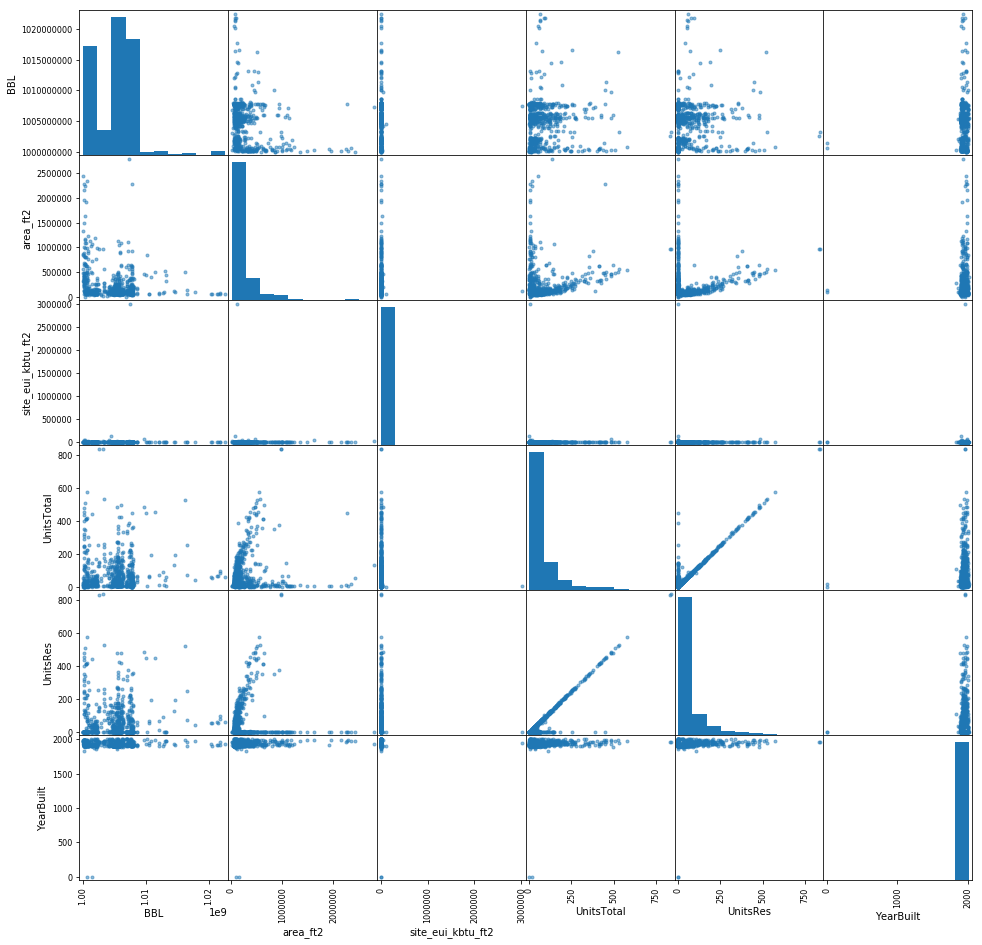

In [26]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(m, figsize = (16, 16))
## what happen? 

### Calculate the total energy consumption of each Building

In [27]:
m['nrg_kbtu'] = m.site_eui_kbtu_ft2 * m.area_ft2

In [28]:
m.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt,nrg_kbtu
0,1.013110e+09,330000.0,125.4,56,0,1977,41382000.0
1,1.010140e+09,841709.0,154.9,2,0,1999,130380724.1
2,1.007660e+09,59468.0,122.3,8,0,1912,7272936.4
3,1.008150e+09,364000.0,117.0,24,0,1954,42588000.0
4,1.005050e+09,235370.0,82.1,24,0,1926,19323877.0


## plot the 'Energy Consumption V.S. units.'

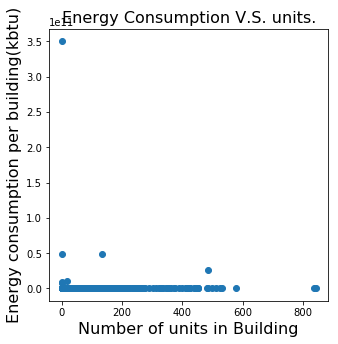

In [29]:
plt.figure(figsize = (5, 5))
plt.scatter(m.UnitsTotal, m.nrg_kbtu)
plt.xlabel('Number of units in Building', fontsize = 16)
plt.ylabel('Energy consumption per building(kbtu)', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)


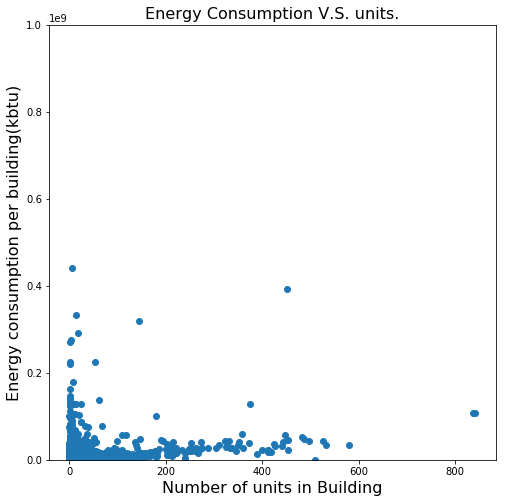

In [30]:
## zoom in on the y axis to 10**9

plt.figure(figsize = (8, 8))
plt.ylim([100, np.power(10, 9)])
plt.scatter(m.UnitsTotal, m.nrg_kbtu)
plt.xlabel('Number of units in Building', fontsize = 16)
plt.ylabel('Energy consumption per building(kbtu)', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)


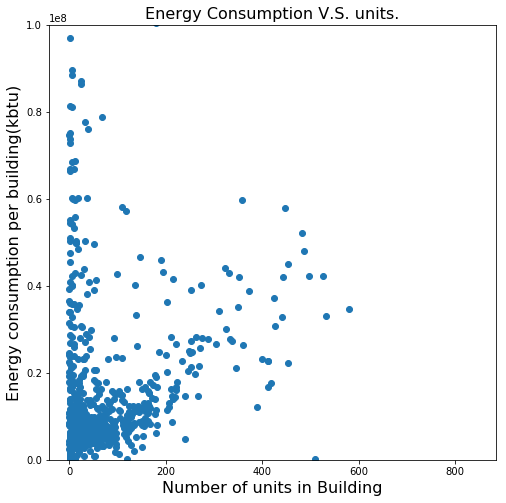

In [31]:
## zoom in more on the y axis to 10**8
## seem better now

plt.figure(figsize = (8, 8))
plt.ylim([100, np.power(10, 8)])
plt.scatter(m.UnitsTotal, m.nrg_kbtu)
plt.xlabel('Number of units in Building', fontsize = 16)
plt.ylabel('Energy consumption per building(kbtu)', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)

### deeper clean the merged table

In [32]:
## exclude the smallest values and largest values
m_cut = m[(m.UnitsTotal > 10)& (m.nrg_kbtu > np.power(10, 6)) & (m.nrg_kbtu < np.power(10, 8))]
m_cut = m_cut.dropna()
m_cut.sort_values(by = 'UnitsTotal', ascending = True, inplace = True)
m_cut.reset_index(drop = True, inplace = True)
m_cut.head()


,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt,nrg_kbtu
0,1.004870e+09,74536.0,48.5,11,9,1900,3614996.0
1,1.001790e+09,56000.0,61.2,11,0,1915,3427200.0
2,1.005458e+09,61237.0,100.6,11,10,1895,6160442.2
3,1.007738e+09,65664.0,111.9,12,12,1900,7347801.6
4,1.000130e+09,887690.0,77.5,12,0,1921,68795975.0


In [33]:
m_cut.shape

(531, 7)

## plot log

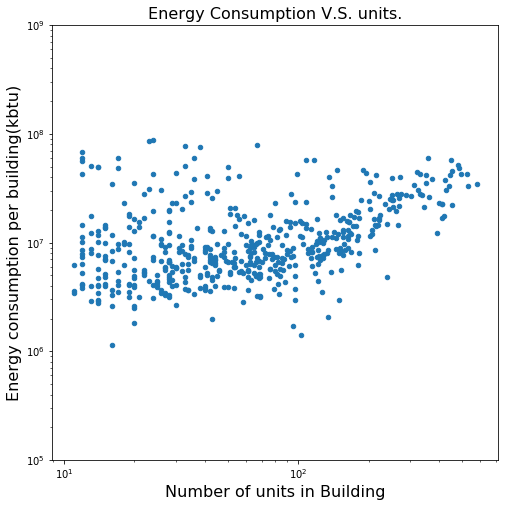

In [34]:

#plt.scatter(m2.UnitsTotal, m2.site_eu_kbtu, loglog=True)

ax = m_cut.plot(kind = 'scatter', y = 'nrg_kbtu', x = 'UnitsTotal',  loglog=True, figsize = (8, 8))

ax.set_ylim([np.power(10, 5), np.power(10, 9)])
ax.set_xlabel('Number of units in Building', fontsize = 16)
ax.set_ylabel('Energy consumption per building(kbtu)', fontsize = 16)
ax.set_title('Energy Consumption V.S. units.', fontsize = 16)


### It seems like there is a linear relationship between log(units) and log(energy consumption)

## FIT



1. **Fit a line** to Units vs Energy. The independent variable in this problem should be number of units, but try fit both Unity to energy and energy to unit.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**.  Can you compare these models with the likelihood ratio test? (hint: are they nested??) I provide a function to calculate the chi square or you can write your own.

    The function is :
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value  model($x_i$) is the prediction, data($x_i$) the observation,
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors?? see next point)
    
4. *Assume Poisson statistics* for the errors on the *independent variable*. Poisson statistics means your uncertainty is the square root of your measurement. I wrote down the formula for the errors. Please explain why I wrote it as I did.

5. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2 + bx + c$ .

6. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * log(Likelihood_Model1 / Likelihood_Model2) 

    or equivalently
        
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2) 
    
    where Model1 is the _least complex_ (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels. (Model1.llf)
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferable to Model2. The LR is chi^2 distributed with number of degrees of freedom $N_{DOF}$ = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))


### fit energy(y) - units(x) and  units(x) ~ energy(y) 

In [35]:
# set log units and energy as x and y, easy to write the fomular
m_cut['y_nrg'] = np.log10(m_cut['nrg_kbtu'])
m_cut['x_unit'] = np.log10(m_cut['UnitsTotal'])

m_cut.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt,nrg_kbtu,y_nrg,x_unit
0,1.004870e+09,74536.0,48.5,11,9,1900,3614996.0,6.558108,1.041393
1,1.001790e+09,56000.0,61.2,11,0,1915,3427200.0,6.534939,1.041393
2,1.005458e+09,61237.0,100.6,11,10,1895,6160442.2,6.789612,1.041393
3,1.007738e+09,65664.0,111.9,12,12,1900,7347801.6,6.866157,1.079181
4,1.000130e+09,887690.0,77.5,12,0,1921,68795975.0,7.837563,1.079181


In [36]:
lm1 = smf.ols(formula = 'y_nrg ~ x_unit', data = m_cut).fit()
lm2 = smf.ols(formula = 'x_unit ~ y_nrg', data = m_cut).fit()

In [37]:
print(lm1.rsquared, lm2.rsquared)

0.142616382855 0.142616382855


In [38]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_nrg   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     87.99
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           1.92e-19
Time:                        04:01:46   Log-Likelihood:                -146.44
No. Observations:                 531   AIC:                             296.9
Df Residuals:                     529   BIC:                             305.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.4472      0.060    107.323      0.000         6.329     6.565
x_unit         0.3098      0.033      9.380      0.000         0.245     0.375
==============================================================================
Omnibus:                       58.713   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.807
Skew:                           0.802   Prob(JB):                     2.84e-18
Kurtosis:                       4.039   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 6  +  0.31 * x,     R-squared = 0.142616382855


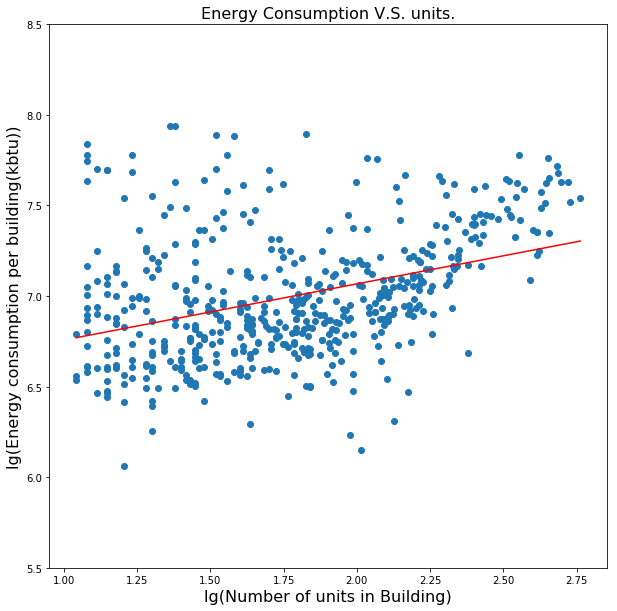

In [39]:
y_predict = lm1.params[0] + lm1.params[1] * m_cut.x_unit
plt.figure(figsize=(10,10))
plt.scatter(m_cut.x_unit, m_cut.y_nrg)
plt.plot(m_cut.x_unit, y_predict, c = 'r')

plt.ylim([5.5, 8.5])
plt.xlabel('lg(Number of units in Building)', fontsize = 16)
plt.ylabel('lg(Energy consumption per building(kbtu))', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)

print('y =', int(lm1.params[0]), ' + ', round(lm1.params[1],3),
      '* x,     R-squared =', lm1.rsquared)

x = -1  +  0.46 * y,     R-squared = 0.142616382855


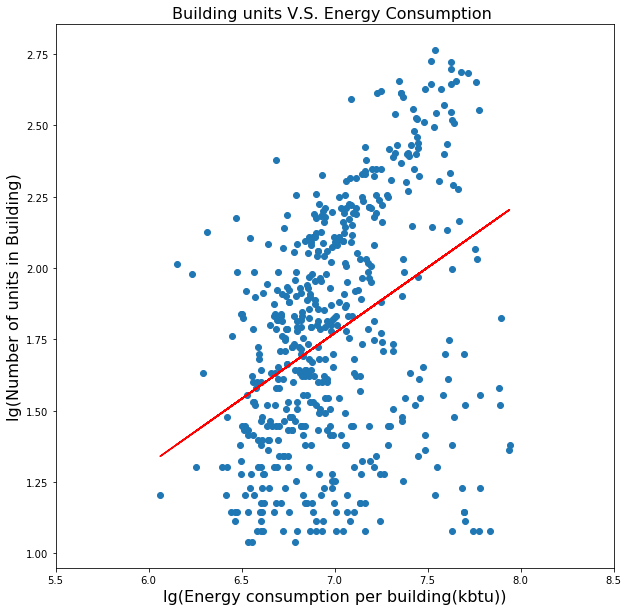

In [40]:
x_predict = lm2.params[0] + lm2.params[1] * m_cut.y_nrg
plt.figure(figsize=(10,10))
plt.scatter(m_cut.y_nrg, m_cut.x_unit)
plt.plot(m_cut.y_nrg, x_predict, c = 'r')

plt.xlim([5.5, 8.5])
plt.ylabel('lg(Number of units in Building)', fontsize = 16)
plt.xlabel('lg(Energy consumption per building(kbtu))', fontsize = 16)
plt.title('Building units V.S. Energy Consumption ', fontsize = 16)

print('x =', int(lm2.params[0]), ' + ', round(lm2.params[1],3),
      '* y,     R-squared =', lm2.rsquared)

Evaluate which is better by calculating the chi square**.  Can you compare these models with the likelihood ratio test? 

   The function is :
    
chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value  model($x_i$) is the prediction, data($x_i$) the observation,
    
    and 
$error_i$ 
is 
$\sqrt{data(x_i)}$

In [41]:
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [42]:
errorsnrg = np.sqrt((m_cut['area_ft2']**2) +(m_cut['site_eui_kbtu_ft2'] **2))

errorsunits = np.sqrt(m_cut.UnitsTotal)

In [43]:
errorsnrg.head()

0     74536.015779
1     56000.033441
2     61237.082633
3     65664.095346
4    887690.003383
dtype: float64

propagation of errors on the log:https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Linear_combinations

$f=a\log _{10}(A)$

$\sigma _{f}\approx \left(a{\frac {\sigma _{A}}{A\ln(10)}}\right)$

In [44]:
errorsInLogNrg = np.abs(errorsnrg / m_cut.nrg_kbtu / np.log(10))

errorsInLogUnits = np.abs(errorsunits / m_cut.UnitsTotal / np.log(10))

m_cut['errorsnrg'] = errorsInLogNrg
m_cut['errorsunits'] = errorsInLogUnits
m_cut.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt,nrg_kbtu,y_nrg,x_unit,errorsnrg,errorsunits
0,1.004870e+09,74536.0,48.5,11,9,1900,3614996.0,6.558108,1.041393,0.008955,0.130945
1,1.001790e+09,56000.0,61.2,11,0,1915,3427200.0,6.534939,1.041393,0.007096,0.130945
2,1.005458e+09,61237.0,100.6,11,10,1895,6160442.2,6.789612,1.041393,0.004317,0.130945
3,1.007738e+09,65664.0,111.9,12,12,1900,7347801.6,6.866157,1.079181,0.003881,0.125370
4,1.000130e+09,887690.0,77.5,12,0,1921,68795975.0,7.837563,1.079181,0.005604,0.125370


In [45]:
chi2(m_cut.y_nrg, y_predict, errors = m_cut.errorsnrg)

4537447.271121841

In [46]:
chi2(m_cut.x_unit, x_predict, errors = m_cut.errorsunits)

51949.3715981285

### chi value of lm1 > chi value of lm2
### lm1 fits better
### So set Units as independent variable, and Energy Consumption as dependent variable

# Fit 2 degree polynomial

In [47]:
m_cut['x2'] = np.power(m_cut.x_unit, 2)
m_cut.head()

,BBL,area_ft2,site_eui_kbtu_ft2,UnitsTotal,UnitsRes,YearBuilt,nrg_kbtu,y_nrg,x_unit,errorsnrg,errorsunits,x2
0,1.004870e+09,74536.0,48.5,11,9,1900,3614996.0,6.558108,1.041393,0.008955,0.130945,1.084499
1,1.001790e+09,56000.0,61.2,11,0,1915,3427200.0,6.534939,1.041393,0.007096,0.130945,1.084499
2,1.005458e+09,61237.0,100.6,11,10,1895,6160442.2,6.789612,1.041393,0.004317,0.130945,1.084499
3,1.007738e+09,65664.0,111.9,12,12,1900,7347801.6,6.866157,1.079181,0.003881,0.125370,1.164632
4,1.000130e+09,887690.0,77.5,12,0,1921,68795975.0,7.837563,1.079181,0.005604,0.125370,1.164632


In [48]:
lm3 = smf.ols('y_nrg ~ x_unit + x2', m_cut).fit()

In [49]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_nrg   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     78.22
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           1.77e-30
Time:                        04:01:47   Log-Likelihood:                -118.39
No. Observations:                 531   AIC:                             242.8
Df Residuals:                     528   BIC:                             255.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.1173      0.225     36.061      0.000         7.675     8.560
x_unit        -1.6311      0.255     -6.396      0.000        -2.132    -1.130
x2             0.5335      0.070      7.670      0.000         0.397     0.670
==============================================================================
Omnibus:                       67.079   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.022
Skew:                           0.834   Prob(JB):                     4.26e-23
Kurtosis:                       4.370   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 8  +  -1.631 * x +  0.534 * x^2,     R-squared = 0.228563870667


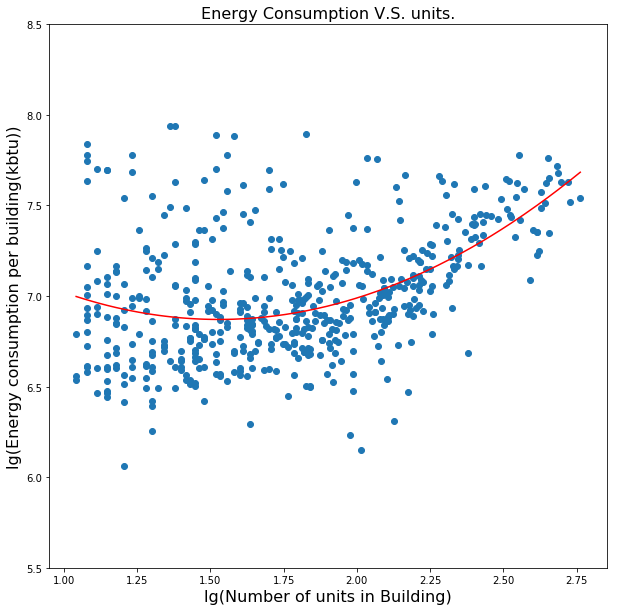

In [50]:
y_predict2 = lm3.params[0] + lm3.params[1] * m_cut.x_unit + lm3.params[2] * np.power(m_cut.x_unit, 2)
plt.figure(figsize=(10,10))
plt.scatter(m_cut.x_unit, m_cut.y_nrg)
plt.plot(m_cut.x_unit, y_predict2, c = 'r')

plt.ylim([5.5, 8.5])
plt.xlabel('lg(Number of units in Building)', fontsize = 16)
plt.ylabel('lg(Energy consumption per building(kbtu))', fontsize = 16)
plt.title('Energy Consumption V.S. units.', fontsize = 16)

print('y =', int(lm3.params[0]), ' + ', round(lm3.params[1],3), '* x + ', round(lm3.params[2],3),
      '* x^2,     R-squared =', lm3.rsquared)

Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * log(Likelihood_Model1 / Likelihood_Model2) 

    or equivalently
        
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2) 
    
    where Model1 is the _least complex_ (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels. (Model1.llf)
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferable to Model2. The LR is chi^2 distributed with number of degrees of freedom 
$N_{DOF}$ = parameters_Model2 - parameters_Model1

In [51]:
print ("LR : ", -2 * (-lm1.llf - (-lm3.llf)))

LR :  -56.0903613602


### Degree of Freedom = 2 - 1 = 1
#### pvalue < 0.01
#### reject Model1

## Conclusion:
### Model2(curve model) fits better than Model1(line model)